In [ ]:
# Project by Akhil Kumar
# PROJECT - CREDIT CARD FRAUD PREDICTION USING Random Forest
# https://www.linkedin.com/in/akhil-kumar-494951218/
# https://github.com/Akhil4005

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
data=pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
print(data.shape)
print(data.describe())

(49610, 31)
               Time            V1            V2            V3            V4  \
count  49610.000000  49610.000000  49610.000000  49610.000000  49609.000000   
mean   28803.556239     -0.242569      0.012235      0.693009      0.185186   
std    13097.468525      1.885867      1.630704      1.510559      1.400175   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    21734.250000     -0.992845     -0.562967      0.217605     -0.720957   
50%    33390.000000     -0.247223      0.079282      0.797007      0.190288   
75%    38852.750000      1.155638      0.732318      1.431013      1.067346   
max    44135.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  49609.000000  49609.000000  49609.000000  49609.000000  49609.000000   
mean      -0.257016      0.104114     -0.120255      0.053442      0.123490   
std        1.413057      1.310705      

In [ ]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
print(fraud.shape)
print(valid.shape)

(148, 31)
(49461, 31)


In [ ]:
outlierfrac=len(fraud)/len(valid)
print(outlierfrac)
print("Fraud Cases: {}".format(len(data[data['Class']==1])))
print("Valid Cases: {}".format(len(data[data['Class']==0])))

0.0029922565253431995
Fraud Cases: 148
Valid Cases: 49461


In [ ]:
print("Amount details of the fraudulent transaction")
print(fraud.Amount.describe())

Amount details of the fraudulent transaction
count     148.000000
mean      100.170676
std       233.347471
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [ ]:
print("Amount details of the valid transaction")
print(valid.Amount.describe())

Amount details of the valid transaction
count    49461.000000
mean        93.099593
std        253.325102
min          0.000000
25%          7.680000
50%         25.000000
75%         85.000000
max      12910.930000
Name: Amount, dtype: float64


In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Correlation Matrix:
            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000 -0.005175 -0.108226 -0.059836 -0.034093 -0.075760 -0.004925   
V1     -0.005175  1.000000 -0.049820  0.300701 -0.098096  0.090339  0.105287   
V2     -0.108226 -0.049820  1.000000 -0.196895  0.097895 -0.111988 -0.008590   
V3     -0.059836  0.300701 -0.196895  1.000000 -0.142634  0.301734 -0.008739   
V4     -0.034093 -0.098096  0.097895 -0.142634  1.000000 -0.054294 -0.053092   
V5     -0.075760  0.090339 -0.111988  0.301734 -0.054294  1.000000  0.074200   
V6     -0.004925  0.105287 -0.008590 -0.008739 -0.053092  0.074200  1.000000   
V7     -0.009393  0.161688 -0.068698  0.331018 -0.093911  0.055122  0.107260   
V8      0.041860 -0.098520  0.080488 -0.274999  0.090697 -0.113355 -0.057708   
V9     -0.338263 -0.031668 -0.016021  0.165447 -0.004522  0.066371  0.046479   
V10     0.099452  0.053959 -0.029492  0.205716 -0.118667  0.154500  0.029207   
V11    -0.207438 -0.

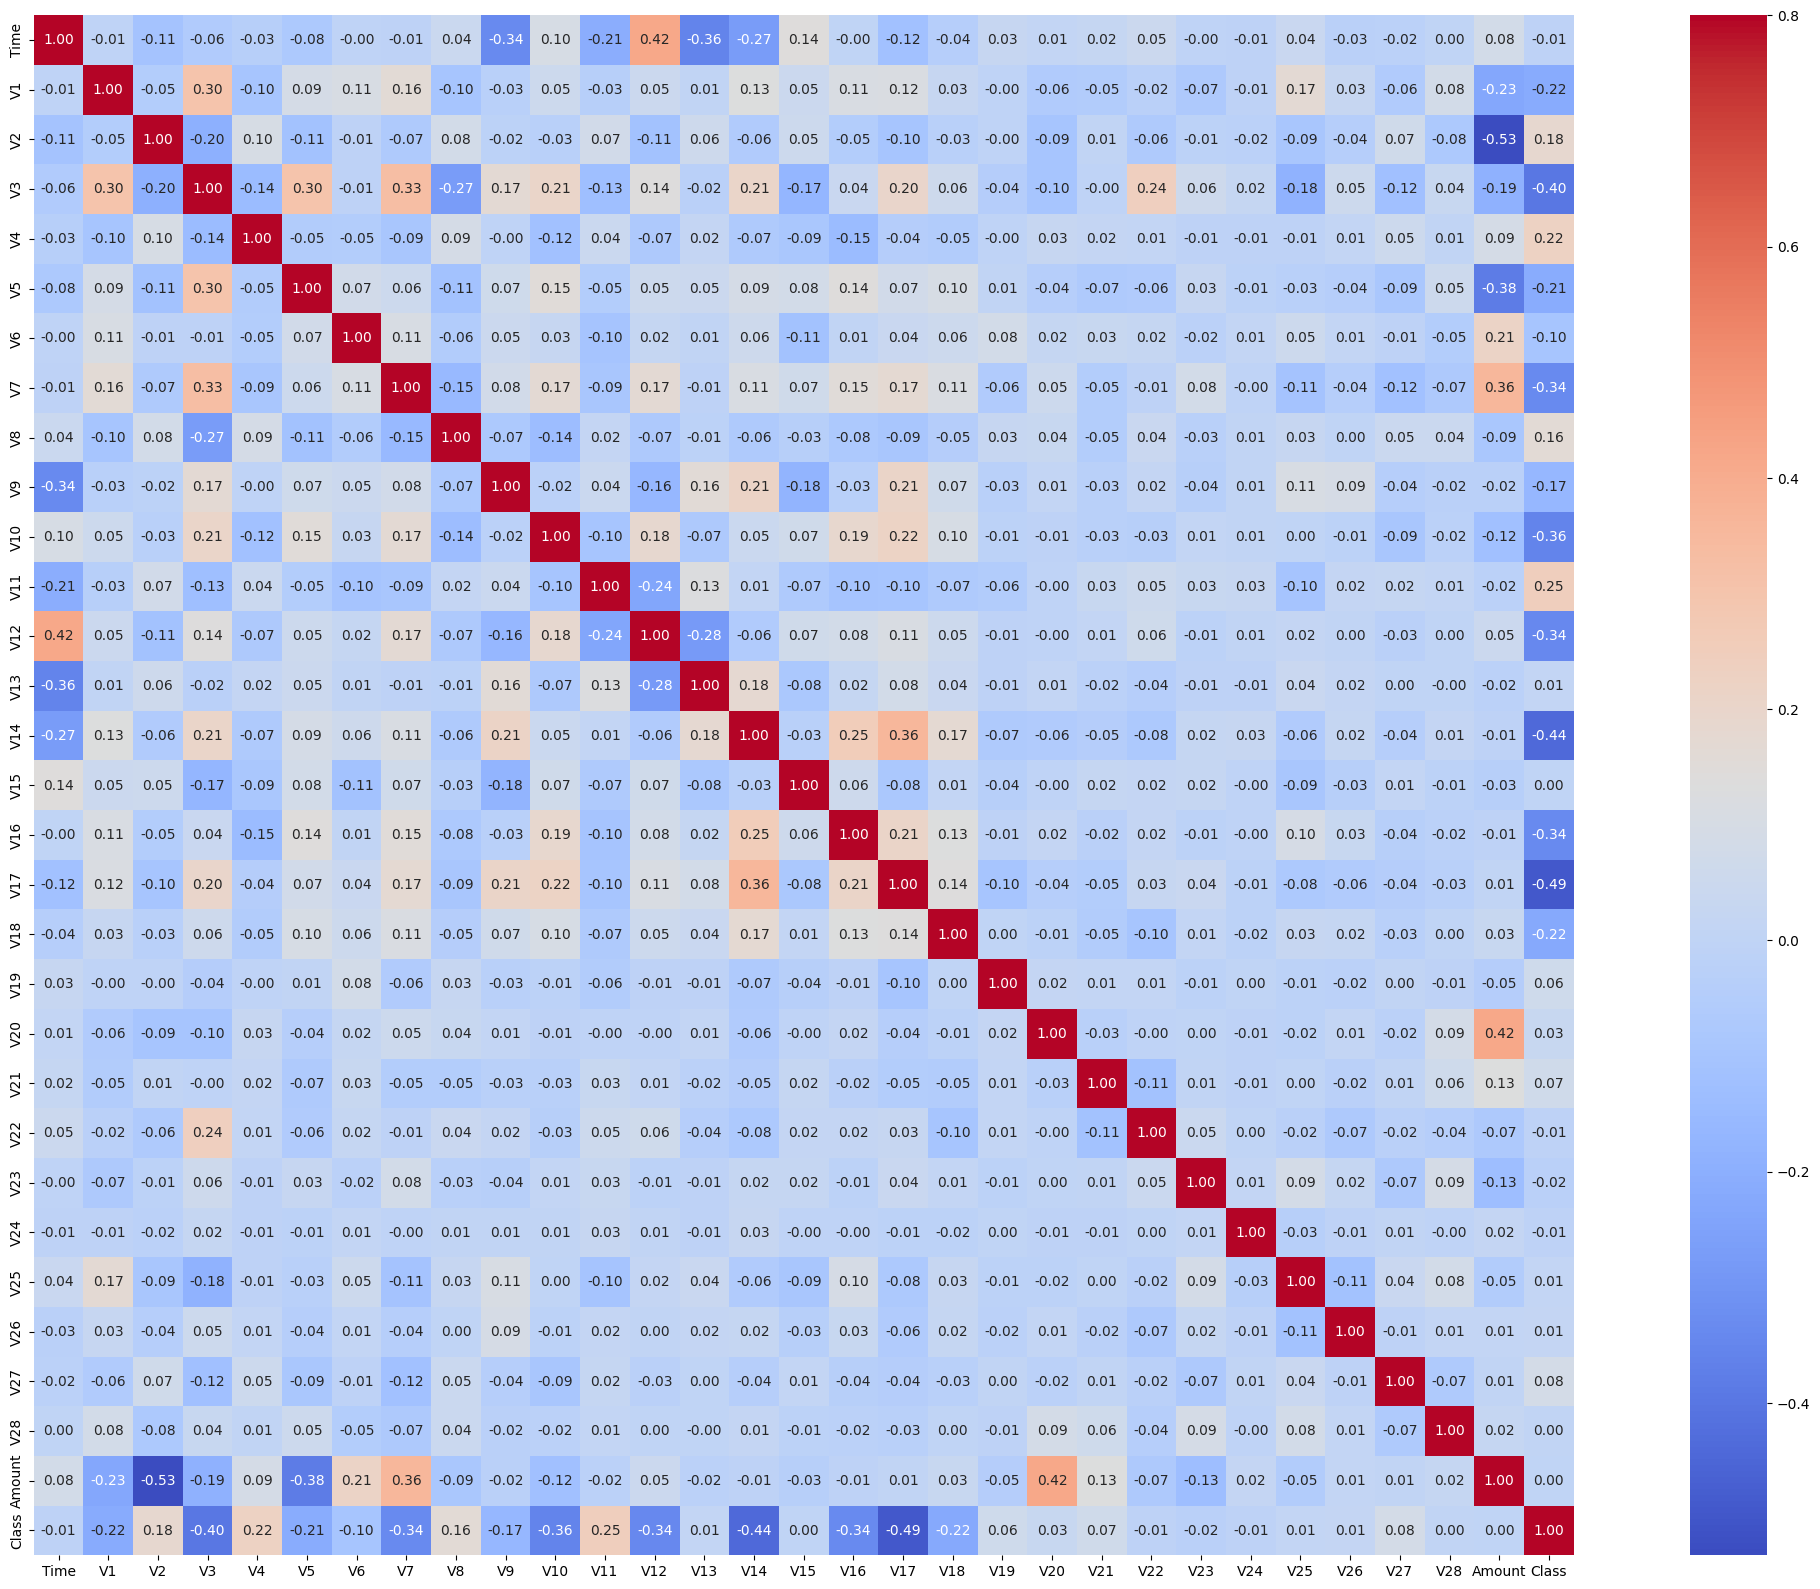

In [ ]:
# correlation heatmap
corrmat = data.corr()
print("Correlation Matrix:")
print(corrmat)
fig = plt.figure(figsize = (30, 20))
sns.heatmap(corrmat, vmax = .8, square = True,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

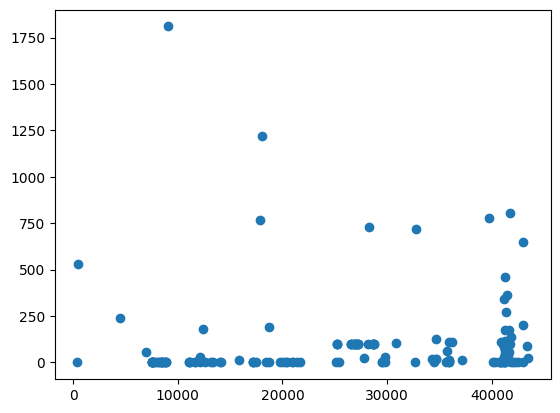

In [ ]:
#frauds with time
plt.scatter(x=data.loc[data['Class']==1]['Time'], y=data.loc[data['Class']==1]['Amount'])
plt.show()

<Figure size 75x50 with 0 Axes>

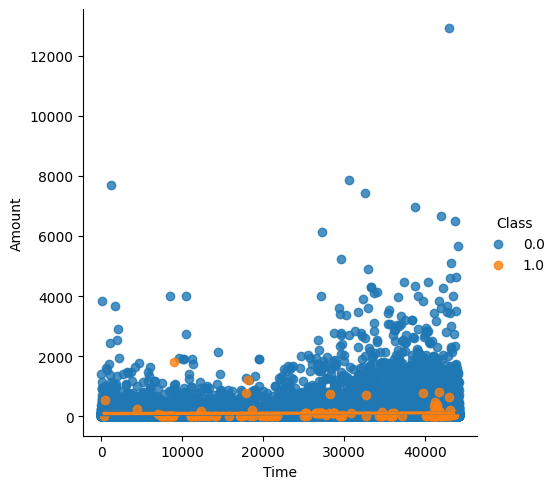

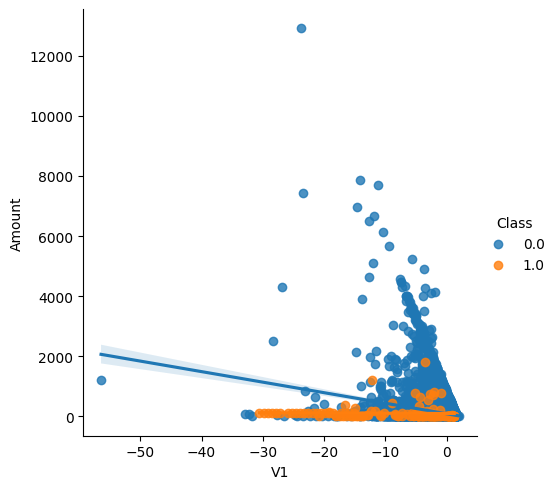

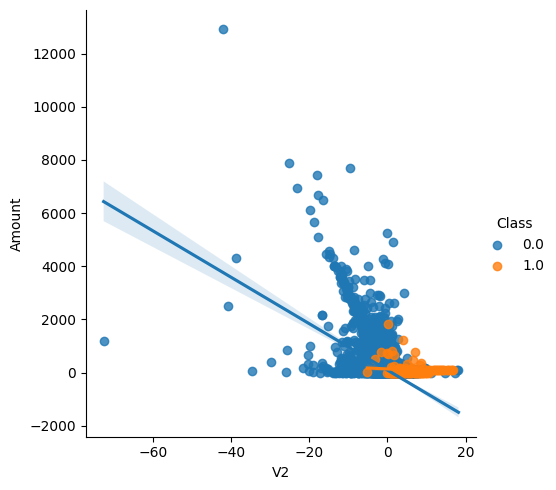

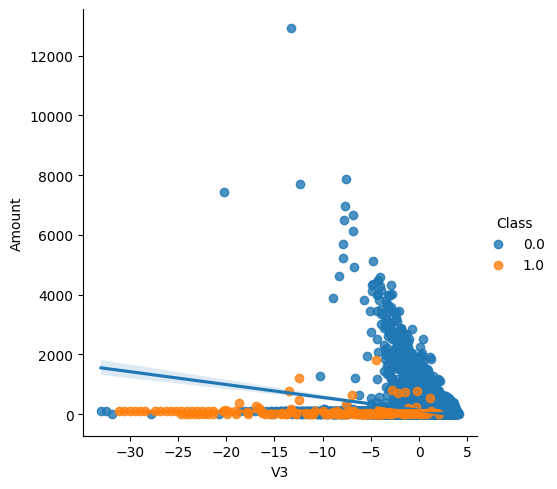

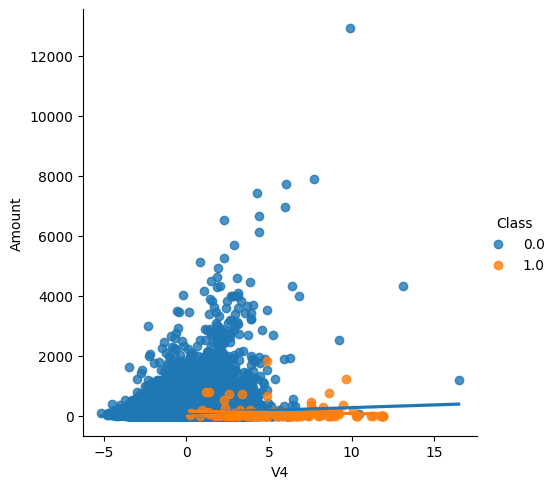

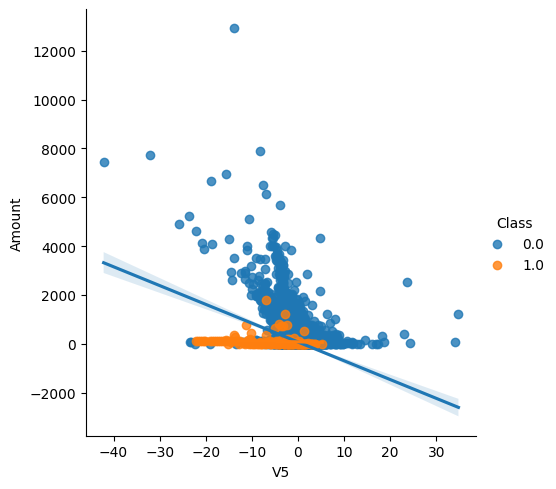

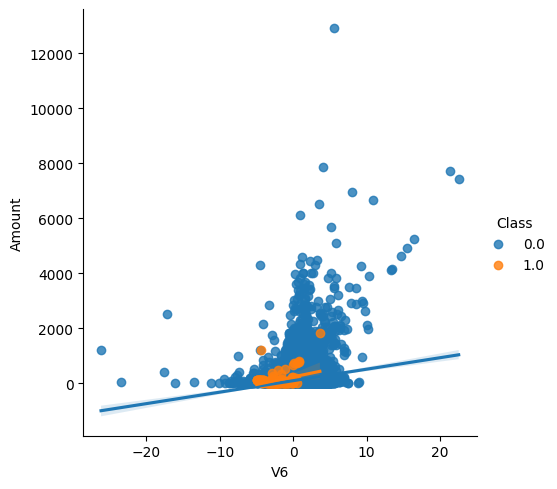

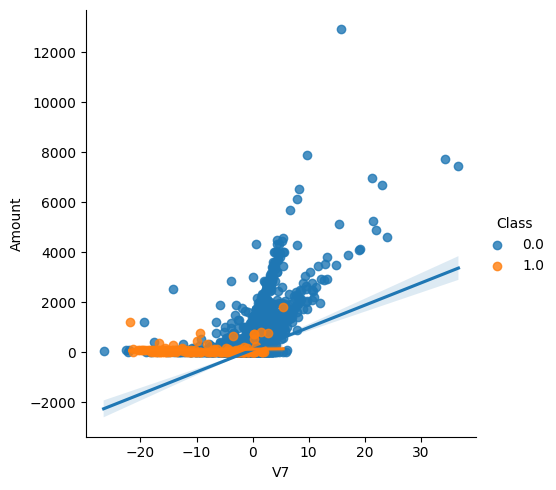

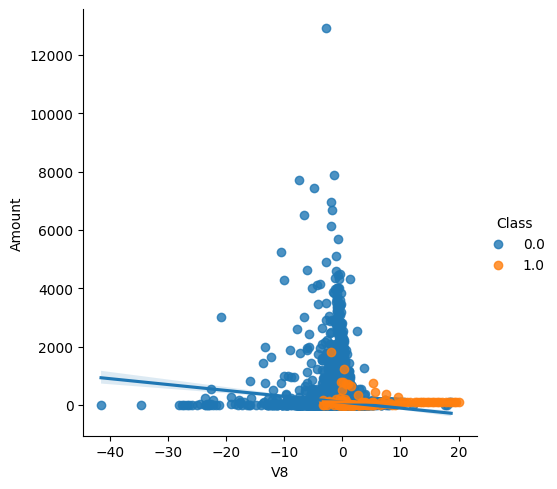

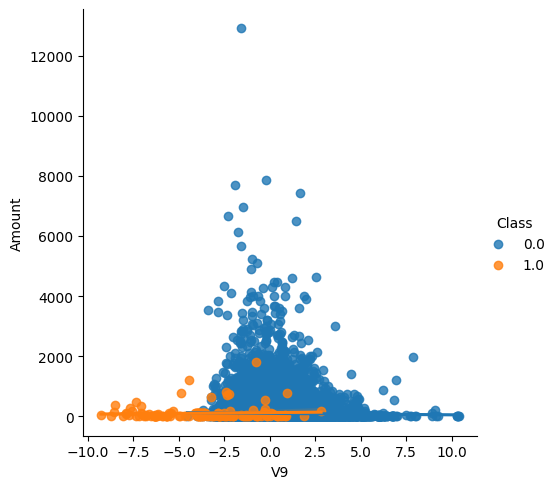

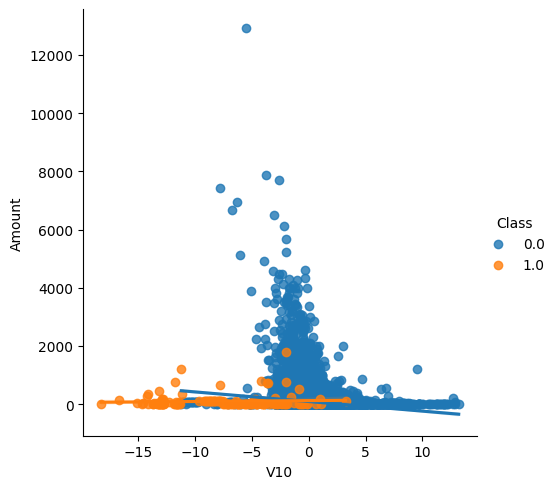

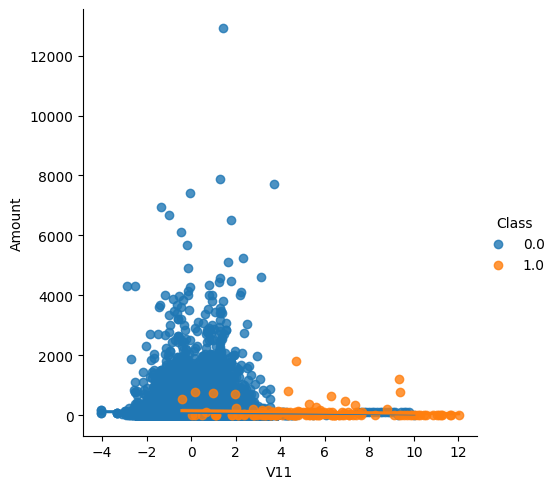

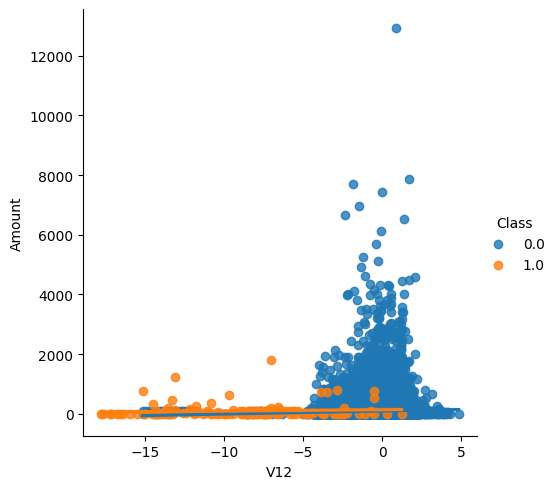

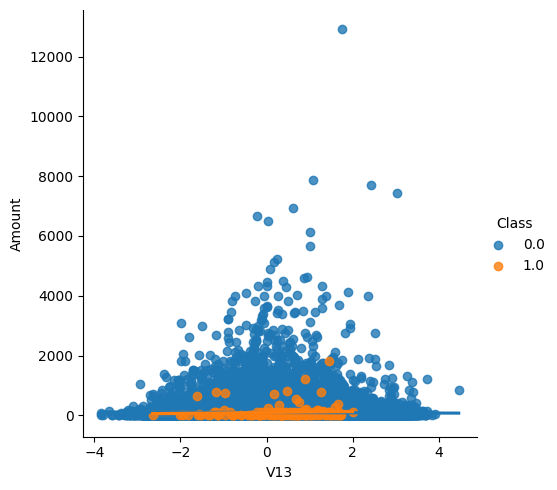

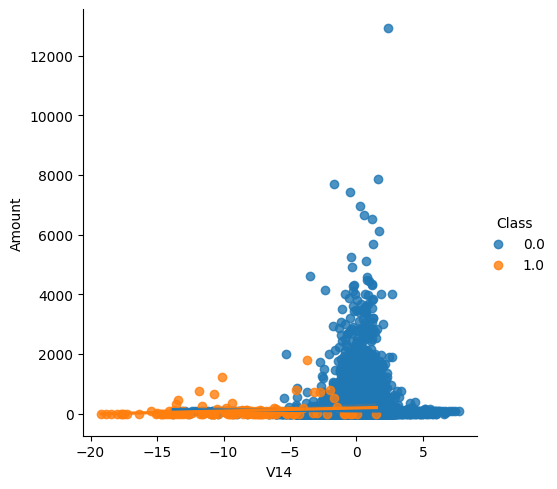

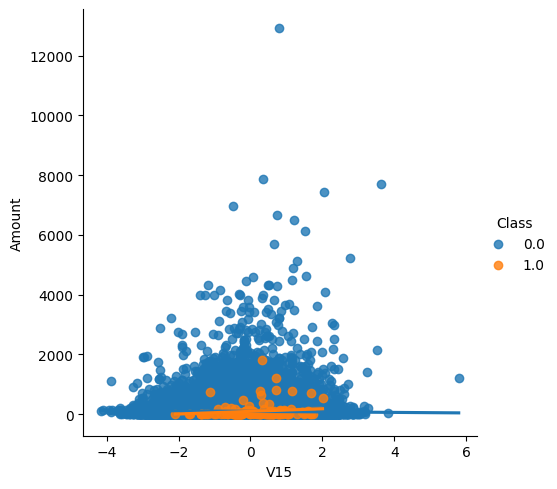

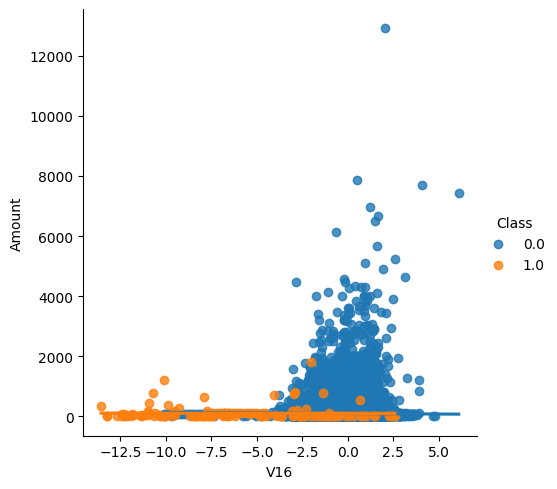

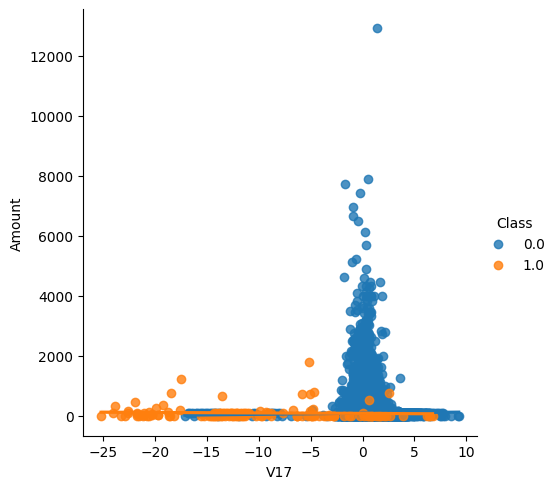

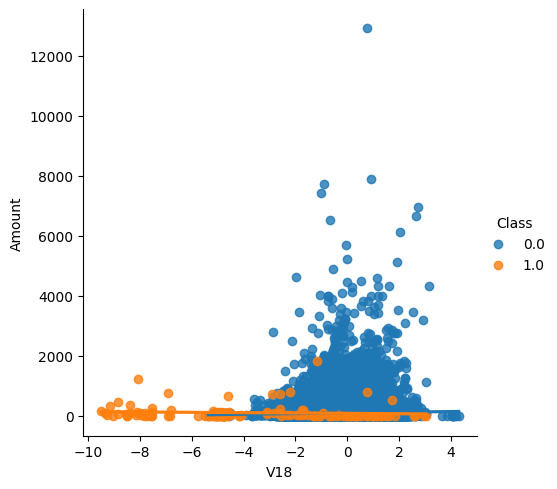

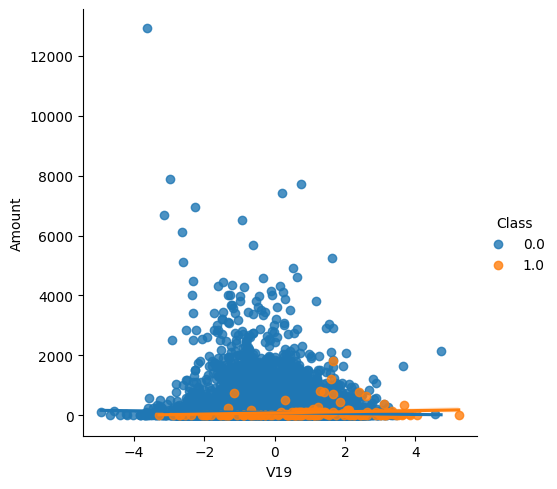

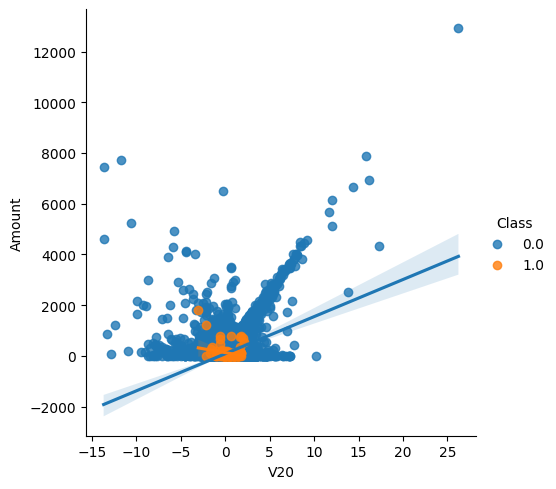

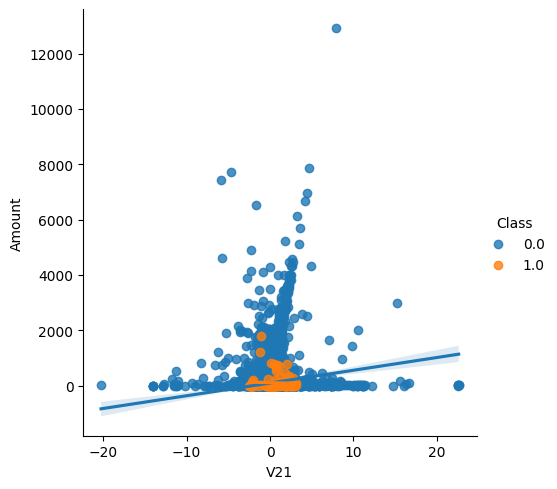

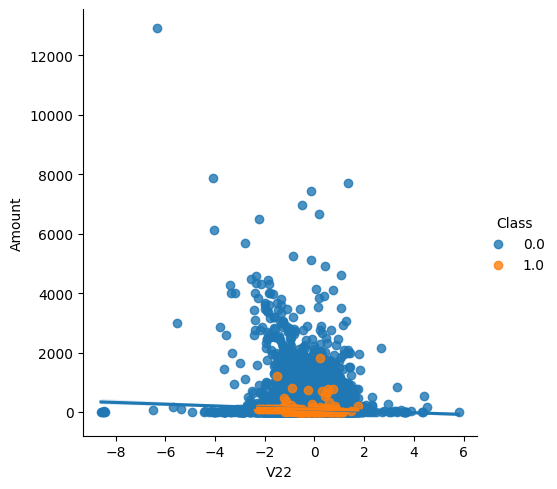

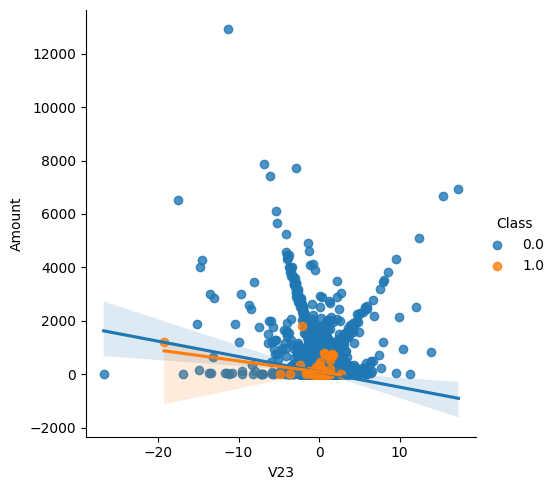

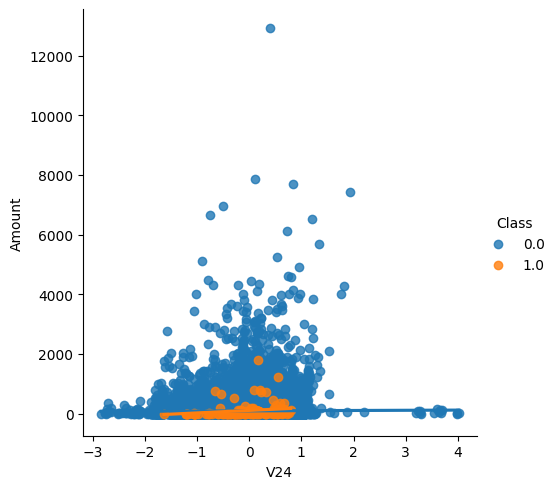

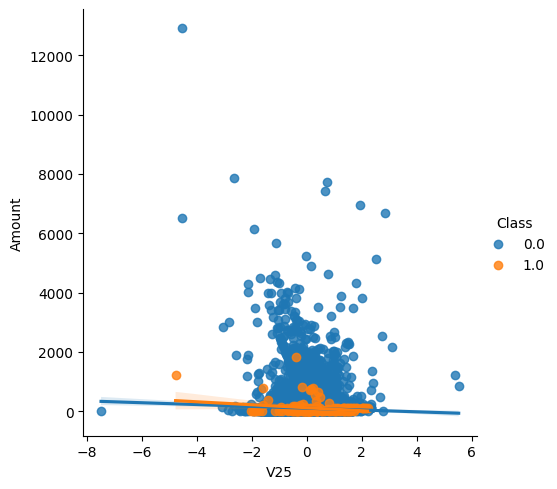

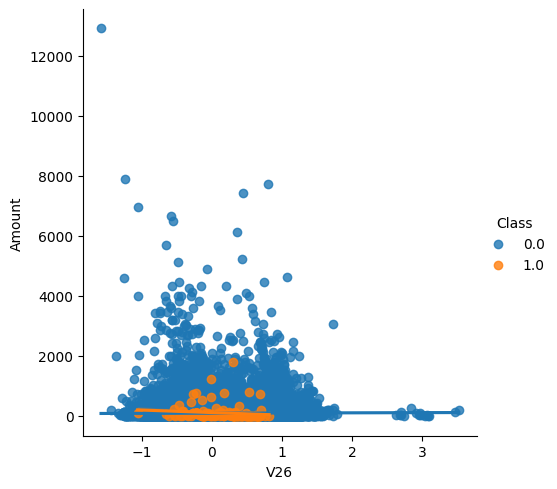

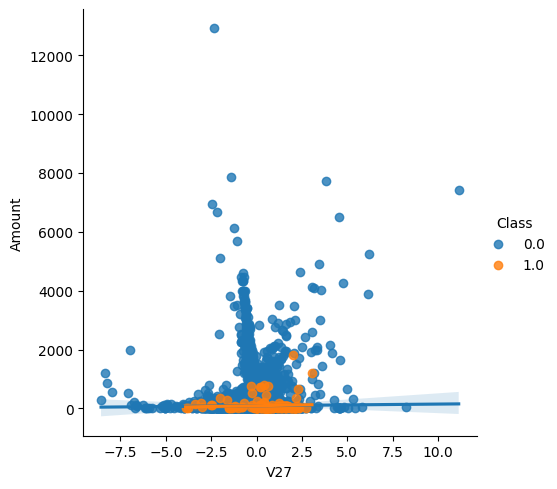

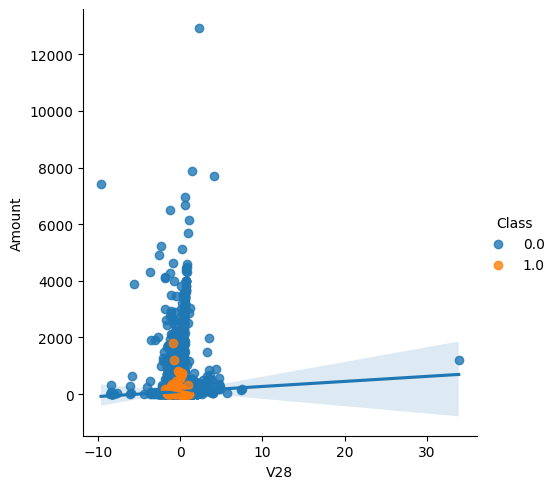

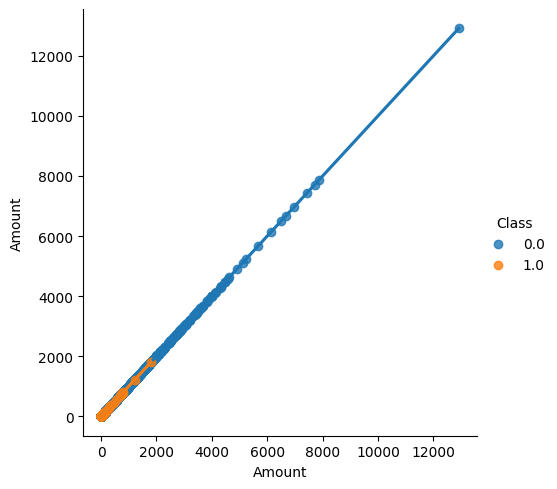

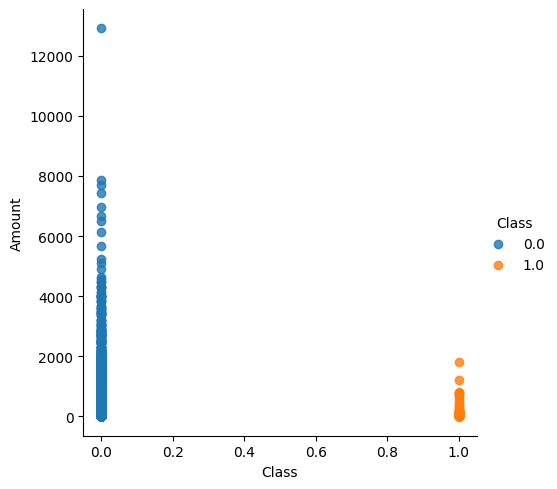

In [ ]:
plt.gcf().set_size_inches(0.75, 0.5)
for col in data.columns:
  sns.lmplot(x=col, y='Amount', hue='Class', data=data)
  plt.show()

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values


(49609, 30)
(49609,)


In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)


In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
print("The total outliers are{}".format(n_outliers))

n_errors = (yPred != yTest).sum()
print("The taotal error is {}".format(n_errors))
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The total outliers are148
The taotal error is 3
The model used is Random Forest classifier
The accuracy is 0.9996976416045152
The precision is 1.0
The recall is 0.9090909090909091
The F1-Score is 0.9523809523809523
The Matthews correlation coefficient is0.9533179974202829


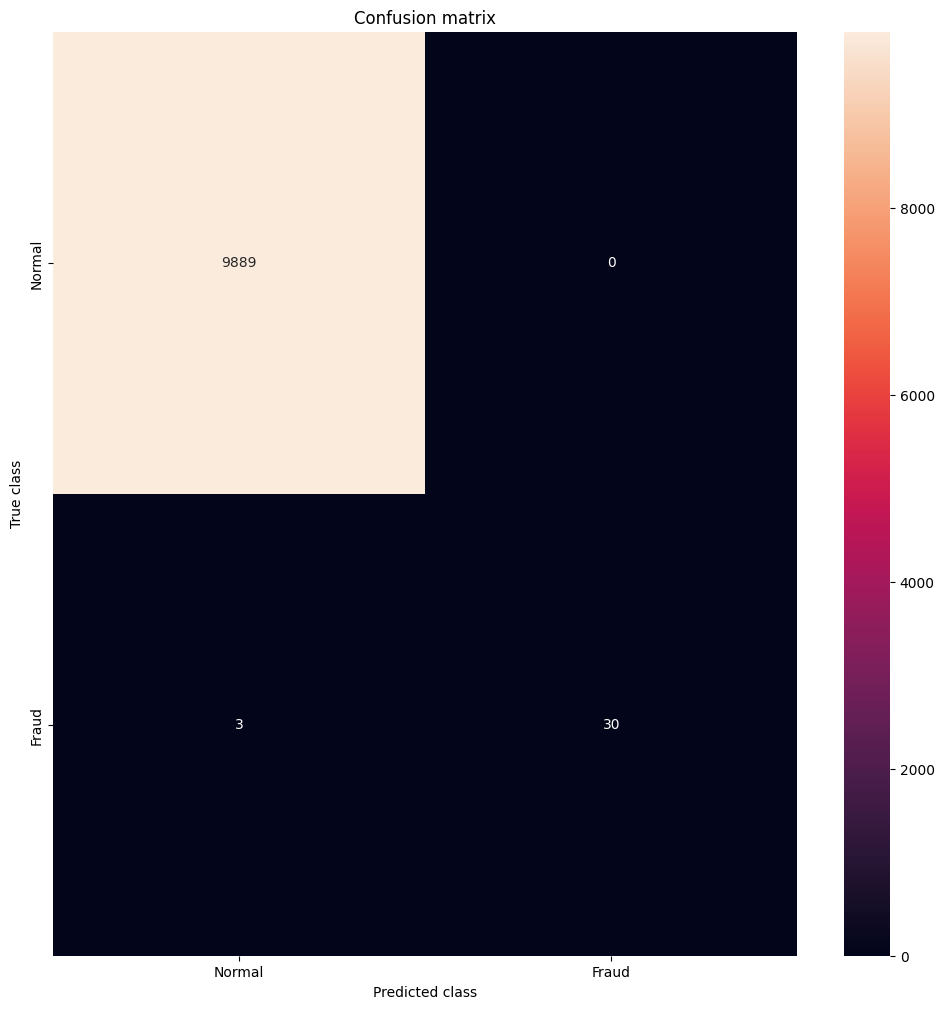

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
